In [25]:
#Finance_fraud detection analysis

Introduction about the finance_fraud_dataset

The dataset comprises of 15 columns and 1050 financial transaction records collected for the purpose of analyzing and detection of any fraudulent activities. 
We're tasked to study and analyze the dataset for any missing values, wrong data formats, duplicates and any outliers.

The dataset contains the following key features:
1. Transaction information such as transaction IDs, Transaction dates and Amount transacted.
2. Payment and Merchant details which represent how payments were made, the MerchantName,MerchantCategory and Location of the transaction
3. Customer Profile such as the CustomerID, CustomerAge and CustomerGender.
4. Fraud detection Label named IsFraud which indicates whether a transaction is suspected or confirmed as fraudulent though fields are inconsistently labeled.
5. Device and Card metadata which reflects the DeviceType used and CardType relevant for fraud detection.

It is clearly visible before any data manipulation that missing values are prevelant in every column, some fields are inconsistently formatted such as the Amount field, the dataset also has categorical inconsistencies thus its suitable for preprocessing and cleaning.


In [ ]:
'''
Objectives:
1. Load and preprocess the dataset.
2. Inspect the data for dataset for empty values, wrong data types, wrong formats, duplicates and outliers.
3. Analyze the data to find patterns and relationships.
4. Visualize the data to understand distributions and correlations.
5. Evaluate the model performance using appropriate metrics.
6. Document the findings and insights from the analysis.
7. Save the cleaned and processed data for future use.
8. Implement a basic machine learning model to predict fraud.  
'''

'\nObjectives:\n1. Load and preprocess the dataset.\n2. Inspect the data for dataset for empty values, wrong data types, wrong formats, duplicates and outliers.\n3. Analyze the data to find patterns and relationships.\n4. Visualize the data to understand distributions and correlations.\n5. Evaluate the model performance using appropriate metrics.\n6. Document the findings and insights from the analysis.\n7. Save the cleaned and processed data for future use.\n8. Implement a basic machine learning model to predict fraud.  \n'

: 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns   
from datetime import datetime

: 

In [ ]:
# Load the dataset to perform initial inspection.
df = pd.read_csv('finance_fraud_data.csv')

#Initial inspection of the dataset
df.head(10)

,TransactionID,TransactionDate,CustomerID,Amount,Currency,PaymentMethod,MerchantName,MerchantCategory,Location,DeviceType,CardType,TransactionStatus,IsFraud,CustomerAge,CustomerGender
0,308757.0,2024-04-21,NaN,NaN,UGX,BitCoin,Amazon,Gadgets,Cairo,ATM,Visa,Success,0,NaN,Female
1,455081.0,2024-05-16,CUST550,1042.55,1234,Wire Transfer,Jumia,Groceries,New York,POS,MasterCard,Success,0,NaN,X
2,309991.0,2024-01-05,NaN,NaN,EUR,BitCoin,NaN,XYZ,Cairo,POS,Amex,Failed,1,NaN,Other
3,723861.0,2024-01-02,NaN,2964.64,EUR,Credit Card,AliExpress,Clothing,Nairobi,Tablet,Amex,NaN,Y,39,Female
4,985029.0,2024-04-11,CUST144,NaN,1234,NaN,NaN,Groceries,Nairobi,Desktop,MasterCard,Failed,Yes,46,X
5,523927.0,32-13-2024,CUST303,NaN,USD,Debit Card,Jumia,Groceries,New York,Mobile,NaN,Success,N,NaN,NaN
6,228725.0,2024-01-04,CUST390,NaN,NaN,Debit Card,eBay,Electronics,Nairobi,Mobile,BitcoinCard,Success,1,NaN,Female
7,344181.0,2024-02-13,NaN,NaN,KES,BitCoin,NaN,NaN,Unknown,Desktop,BitcoinCard,In Progress,Yes,NaN,Male
8,978821.0,2024-06-16,CUST836,NaN,UGX,Wire Transfer,AliExpress,Clothing,Cairo,PC,BitcoinCard,NaN,N,NaN,Male
9,545334.0,2024-05-02,NaN,NaN,USD,Credit Card,AliExpress,Clothing,NaN,Mobile,BitcoinCard,In Progress,Yes,NaN,Other


: 

In [ ]:
#Shape of the dataset
df.shape

(1050, 15)

: 

In [ ]:
#More initial inspection.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      1040 non-null   float64
 1   TransactionDate    1040 non-null   object 
 2   CustomerID         338 non-null    object 
 3   Amount             270 non-null    object 
 4   Currency           874 non-null    object 
 5   PaymentMethod      885 non-null    object 
 6   MerchantName       860 non-null    object 
 7   MerchantCategory   890 non-null    object 
 8   Location           895 non-null    object 
 9   DeviceType         903 non-null    object 
 10  CardType           866 non-null    object 
 11  TransactionStatus  848 non-null    object 
 12  IsFraud            798 non-null    object 
 13  CustomerAge        261 non-null    object 
 14  CustomerGender     850 non-null    object 
dtypes: float64(1), object(14)
memory usage: 123.2+ KB


: 

In [ ]:
#Descriptive statistics of the dataset
df.describe() #only returns numerical columns

,TransactionID
count,1040.000000
mean,560874.938462
std,257444.600279
min,103225.000000
25%,349641.000000
50%,557243.500000
75%,786388.750000
max,999308.000000


: 

In [ ]:
#Further descriptive statistics of all columns in the dataset
df.describe(include='all') #returns all columns, including categorical ones

,TransactionID,TransactionDate,CustomerID,Amount,Currency,PaymentMethod,MerchantName,MerchantCategory,Location,DeviceType,CardType,TransactionStatus,IsFraud,CustomerAge,CustomerGender
count,1040.000000,1040,338,270,874,885,860,890,895,903,866,848,798,261,850
unique,NaN,182,271,254,6,6,5,5,6,6,5,4,8,53,4
top,NaN,2024-04-23,CUST770,4590.8,1234,Debit Card,Shopify,Groceries,Cairo,PC,BitcoinCard,Failed,Maybe,63,X
freq,NaN,14,4,2,188,169,181,182,172,168,203,234,136,8,242
mean,560874.938462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,257444.600279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,103225.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,349641.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,557243.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,786388.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


: 

In [ ]:
#Check for data types of each column
df.dtypes

TransactionID        float64
TransactionDate       object
CustomerID            object
Amount                object
Currency              object
PaymentMethod         object
MerchantName          object
MerchantCategory      object
Location              object
DeviceType            object
CardType              object
TransactionStatus     object
IsFraud               object
CustomerAge           object
CustomerGender        object
dtype: object

: 

In [ ]:
#Check for null values before changing data types
df.isnull().sum()

TransactionID         10
TransactionDate       10
CustomerID           712
Amount               780
Currency             176
PaymentMethod        165
MerchantName         190
MerchantCategory     160
Location             155
DeviceType           147
CardType             184
TransactionStatus    202
IsFraud              252
CustomerAge          789
CustomerGender       200
dtype: int64

: 

In [ ]:
#Convert 'Amount' column to numeric type
#First convert words to numbers
from word2number import w2n
def clean_amount(value):
    try:
        return float(value)
    except:
        try:
            return w2n.word_to_num(str(value))
        except:
            return None  # Return None if conversion fails   
#Then convert to numeric type
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
#Check the data types again
df.dtypes

TransactionID        float64
TransactionDate       object
CustomerID            object
Amount               float64
Currency              object
PaymentMethod         object
MerchantName          object
MerchantCategory      object
Location              object
DeviceType            object
CardType              object
TransactionStatus     object
IsFraud               object
CustomerAge           object
CustomerGender        object
dtype: object

: 

In [ ]:
#Checking for missing values
df.isnull().sum()

TransactionID         10
TransactionDate       10
CustomerID           712
Amount               781
Currency             176
PaymentMethod        165
MerchantName         190
MerchantCategory     160
Location             155
DeviceType           147
CardType             184
TransactionStatus    202
IsFraud              252
CustomerAge          789
CustomerGender       200
dtype: int64

: 

In [ ]:
#Handling missing values.
#Drop unnecessary columns immediately such as TransactionID, TransactionDate, CustomerID, CustomerAge.
df.drop(['TransactionID', 'CustomerID', 'CustomerAge'], axis=1, inplace=True)

#Check for total number of misssing values again
df.isnull().sum()


TransactionDate       10
Amount               781
Currency             176
PaymentMethod        165
MerchantName         190
MerchantCategory     160
Location             155
DeviceType           147
CardType             184
TransactionStatus    202
IsFraud              252
CustomerGender       200
dtype: int64

: 

In [ ]:
import warnings
warnings.filterwarnings("ignore") 

#Fill missing values in categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

#Check for missing values again
df.isnull().sum()

TransactionDate        0
Amount               781
Currency               0
PaymentMethod          0
MerchantName           0
MerchantCategory       0
Location               0
DeviceType             0
CardType               0
TransactionStatus      0
IsFraud                0
CustomerGender         0
dtype: int64

: 

In [ ]:
#Fill missing values in Amount column with mean of the month
#Ensure 'TransactionDate' is in datetime format
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], yearfirst=True, errors='coerce')
#Find mode of valid dates
valid_dates_mode = df['TransactionDate'].mode()[0]  # Get the mode of the valid dates
#Replace invalid dates(NaT) with mode
df['TransactionDate'].fillna(valid_dates_mode, inplace=True)    
#Extract month from 'TransactionDate'
df['Month'] = df['TransactionDate'].dt.month
#Fill missing 'Amount' values with the mean of the corresponding month
df['Amount'] = df.groupby('Month')['Amount'].transform(lambda x: x.fillna(x.mean()))

#Check for missing values again
df.isnull().sum()   

TransactionDate      0
Amount               0
Currency             0
PaymentMethod        0
MerchantName         0
MerchantCategory     0
Location             0
DeviceType           0
CardType             0
TransactionStatus    0
IsFraud              0
CustomerGender       0
Month                0
dtype: int64

: 

In [ ]:
#Handling data with wrong formats.
#Further cleaning for Currency column, MerchantCategory column, Location column, IsFraud column, and CustomerGender column

# Ensure Currency is string type
df['Currency'] = df['Currency'].astype(str).str.strip() 
#1. Replace '1234' in currency with mode
currency_mode = df[df['Currency'] != '1234']['Currency'].mode()[0] # Get the mode of the Currency column excluding '1234'
df['Currency'] = df['Currency'].replace('1234', currency_mode)

#2. Replace 'XYZ' in MerchantCategory with mode
merchant_code = df['MerchantCategory'].mode()[0] # Get the mode of the MerchantCategory column
df['MerchantCategory'] = df['MerchantCategory'].replace('XYZ', merchant_code)

#3. Normalize 'IsFraud' column to just '1' and '0'
def normalize_isFraud(val):
    val = str(val).strip().lower()
    if val in ['yes', '1', 'true', 'y', 'maybe', 'possible']:
        return 1
    elif val in ['no', '0', 'false', 'n', 'never']:
        return 0
    else:
        return None  # Return None for unrecognized values
df['IsFraud'] = df['IsFraud'].apply(normalize_isFraud)

#4. Replace 'X' in 'CustomerGender' column with 'Other'
df['CustomerGender'] = df['CustomerGender'].replace('X', 'Other')

#5. Clean 'Location' column by replacing 'Unknown' with mode to eliminate any noise
df['Location'] = df['Location'].replace('Unknown', df['Location'].mode()[0])



: 

In [ ]:
df.head(10)

,TransactionDate,Amount,Currency,PaymentMethod,MerchantName,MerchantCategory,Location,DeviceType,CardType,TransactionStatus,IsFraud,CustomerGender,Month
0,2024-04-21,2576.829459,UGX,BitCoin,Amazon,Gadgets,Cairo,ATM,Visa,Success,0,Female,4
1,2024-05-16,1042.550000,KES,Wire Transfer,Jumia,Groceries,New York,POS,MasterCard,Success,0,Other,5
2,2024-01-05,2424.438571,EUR,BitCoin,Shopify,Groceries,Cairo,POS,Amex,Failed,1,Other,1
3,2024-01-02,2964.640000,EUR,Credit Card,AliExpress,Clothing,Nairobi,Tablet,Amex,Failed,1,Female,1
4,2024-04-11,2576.829459,KES,Debit Card,Shopify,Groceries,Nairobi,Desktop,MasterCard,Failed,1,Other,4
5,2024-04-23,2576.829459,USD,Debit Card,Jumia,Groceries,New York,Mobile,BitcoinCard,Success,0,Other,4
6,2024-01-04,2424.438571,KES,Debit Card,eBay,Electronics,Nairobi,Mobile,BitcoinCard,Success,1,Female,1
7,2024-02-13,2498.911622,KES,BitCoin,Shopify,Groceries,Cairo,Desktop,BitcoinCard,In Progress,1,Male,2
8,2024-06-16,2776.630204,UGX,Wire Transfer,AliExpress,Clothing,Cairo,PC,BitcoinCard,Failed,0,Male,6
9,2024-05-02,2213.137091,USD,Credit Card,AliExpress,Clothing,Cairo,Mobile,BitcoinCard,In Progress,1,Other,5


: 

In [ ]:
#CHeck for duplicates
duplicates = df.duplicated()
if duplicates.any():
    print(f"Number of duplicate rows: {duplicates.sum()}")
    df.drop_duplicates(inplace=True)
else:
    print("No duplicate rows found.")   


Number of duplicate rows: 48


: 

In [ ]:
#Handle duplicate rows
df.drop_duplicates(inplace=True) 
#Check for duplicates again
duplicates = df.duplicated()
if duplicates.any():
    print(f"Number of duplicate rows after handling: {duplicates.sum()}")
else:
    print("No duplicate rows found after handling.")    

No duplicate rows found after handling.


: 

In [ ]:
#Check the dataset info again
df = df.reset_index(drop=True)  # Reset index after dropping duplicates
df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TransactionDate    1002 non-null   datetime64[ns]
 1   Amount             1002 non-null   float64       
 2   Currency           1002 non-null   object        
 3   PaymentMethod      1002 non-null   object        
 4   MerchantName       1002 non-null   object        
 5   MerchantCategory   1002 non-null   object        
 6   Location           1002 non-null   object        
 7   DeviceType         1002 non-null   object        
 8   CardType           1002 non-null   object        
 9   TransactionStatus  1002 non-null   object        
 10  IsFraud            1002 non-null   int64         
 11  CustomerGender     1002 non-null   object        
 12  Month              1002 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(9)

: 

In [ ]:
#Encode categorical columns into numerical values
from sklearn.preprocessing import LabelEncoder
for col in ['Currency', 'MerchantCategory', 'Location', 'CustomerGender', 'IsFraud', 'PaymentMethod', 'CardType', 'TransactionStatus', 'DeviceType', 'TransactionDate']: 
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to avoid errors


: 

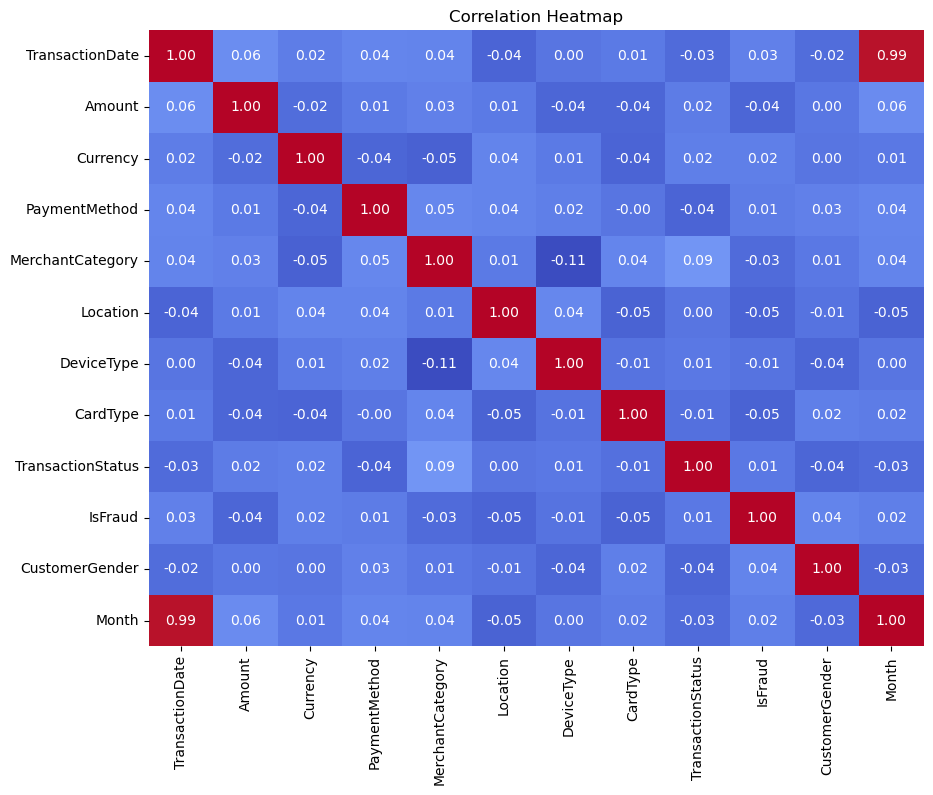

: 

In [ ]:
#Plotting a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cbar=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()  


In [11]:
import pandas as pd 
df = pd.read_csv('finance_fraud_data.csv')
total_rows = len(df)
total_columns = len(df.columns)
print(f"Total number of rows in the dataset: {total_rows}")
print(f"Total number of columns in the dataset: {total_columns}")

Total number of rows in the dataset: 1050
Total number of columns in the dataset: 15


In [ ]:
#identify missing values and determine the percentage of missing data for each feature
missing_values = df.isnull().sum()
missing_percentage = (missing_values / total_rows) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0]
print("Missing Values and their Percentage:")
print(missing_data)

Missing Values and their Percentage:
                   Missing Values  Percentage
TransactionID                  10    0.952381
TransactionDate                10    0.952381
CustomerID                    712   67.809524
Amount                        780   74.285714
Currency                      176   16.761905
PaymentMethod                 165   15.714286
MerchantName                  190   18.095238
MerchantCategory              160   15.238095
Location                      155   14.761905
DeviceType                    147   14.000000
CardType                      184   17.523810
TransactionStatus             202   19.238095
IsFraud                       252   24.000000
CustomerAge                   789   75.142857
CustomerGender                200   19.047619


In [ ]:
#cleaned dataset now using this strategy
import pandas as pd

df = pd.read_csv("finance_fraud_data.csv")
df.drop(['CustomerAge', 'Amount', 'CustomerID'], axis=1, inplace=True)

df['IsFraud'] = df['IsFraud'].fillna(df['IsFraud'].mode()[0])

categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

df.drop(['TransactionID', 'TransactionDate'], axis=1, inplace=True)

missing_summary = df.isnull().sum()
print("Missing values after cleaning:\n", missing_summary[missing_summary > 0])

df.to_csv('cleaned_finance_fraud_data.csv', index=False)
print("Cleaned dataset saved as 'cleaned_finance_fraud_data.csv'.")
df = pd.read_csv('cleaned_finance_fraud_data.csv')
print("Cleaned dataset loaded successfully.")
print(df.head())